**THE SPARKS FOUNDATION**


**TASK 2-PREDICTING THE OPTIMUM NUMBER OF CLUSTERS AND REPRESENTING IT VISUALLY**

***Ankush Kashyap***

In [4]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import datasets


**LOADING THE DATASET**

In [3]:
#loading of the data set
iris= datasets.load_iris()
iris_df= pd.DataFrame(iris.data, columns = iris.feature_names )
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
iris_df.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# **We need to find out the optimum number of clusters for *k*-*means* classification** 

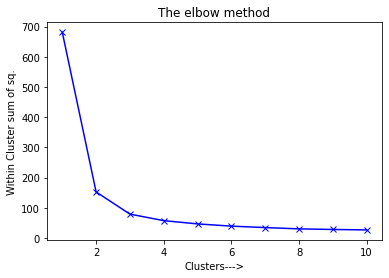

In [15]:
# finding clusters for k mean classifcation

x = iris_df.iloc[:, [0, 1, 2, 3]].values

from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
# ploting the elbow method
plt.plot(range(1, 11), wcss, 'bx-')
plt.title('The elbow method')
plt.xlabel('Clusters--->')
plt.ylabel('Within Cluster sum of sq.') 
plt.show()

**From the above graph we can see an elbow like deviation thats why this method of calculation is called "Elbow Method" . The optimum clusters are formed where the elbow occurs. This is where the within Cluster Sum of squares doesn't decrease with every iteration significantly.**

***From this we choose the number of clusters as '3'.***

In [16]:
#creating k means classifier for 3 clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

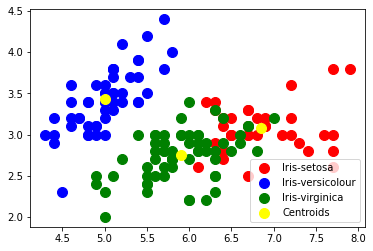

In [17]:
# Visualization of the Clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'red', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'blue', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'green', label = 'Iris-virginica')

# Ploting Centroids of clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'yellow', label = 'Centroids')

plt.legend()

**Yellow points above in the graph are centroids. Therefore the optimum number of clusters is predicted visually**
                         

                             ************************